In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
%matplotlib inline

print('Starting Imports')
from scipy.special import gamma
import sys
from time import time
import resource
import pandas as pd
import os
import itertools
filename = 'ValsDir/'

Nu = [-12,-6.154902]
Eta = [-12,-8.154902]
Lambda = [-12,-6.154902]

Starting Imports


In [2]:
class MechAn:
    def __init__(self,home_dir,EtaLim, NuLim, LambdaLim):
        self.root = home_dir
        self.Eta= EtaLim
        self.Nu = NuLim
        self.Lambda = LambdaLim
        self.FileList = []
        self.percentiles=[.75,.9,.95,.99]
        self.teststatistics={}
        self.stats={}
        self.AreaQuantiles = [.01,.05,.1,.125,.25,.5,.75,.875,.9,.95,.99]
        
    def SetParams(self,**kwargs):
        ParamDict={}
        for key,value in kwargs.items():
            ParamDict[key]=value
        self.ParamDict = ParamDict
        
    def FindFiles(self, ExcludeDirs):
        FileList = []
        flag1 = False
        for root, dirs, files in os.walk(self.root):
            if not np.any([self.root+item == root for item in ExcludeDirs]):
                for file in files:
                    if os.stat(os.path.join(root,file)).st_size>100:
                        try: 
                            tempdat = pd.read_pickle(os.path.join(root,file))
                        except:
                            continue

                        if False not in [self.ParamDict[key] in list(tempdat[key]) for key in self.ParamDict if key != 'TrueE']:
                            if tempdat[tempdat['TrueE'].map(tuple).isin([tuple(self.ParamDict['TrueE'])])].shape[0]>0:
                                FileList.append(os.path.join(root,file))
#                     print(len(FileList))
        print('Found '+str(len(FileList))+' files fitting those parameters')
        self.FileList = FileList
        return (len(FileList))
    
    def GetBestKTLE(self):
        files=1
        for file in self.FileList:
#             print(file)
            if os.path.exists(file):
                tempdf = pd.read_pickle(file)

                if  'FullDF' not in locals():
                    labs = list(tempdf.keys())
                    labs = [item for item in labs if item != 'KTX' and item!= 'KTY' and item!='TX' and item !='TY']
                    FullDF = tempdf[labs]

                else:
                    FullDF = pd.concat([FullDF, tempdf[labs]])
                    files+=1
#                     print('FullDF Loading Shape: ',FullDF.shape)
        for key in self.ParamDict:
            if key == 'TrueE':
                FullDF = FullDF[FullDF[key].map(tuple).isin([tuple(self.ParamDict[key])])]
            else:
                FullDF = FullDF[FullDF[key]==self.ParamDict[key]]

        returnDict = FullDF['KTE']
#         returnDict = returnDict[returnDict['KTE'][0]>=1]
        return returnDict

    
    def GetBestTLE(self):
        files=1
        for file in self.FileList:
#             print(file)
            if os.path.exists(file):
                tempdf = pd.read_pickle(file)

                if  'FullDF' not in locals():
                    labs = list(tempdf.keys())
                    labs = [item for item in labs if item != 'KTX' and item!= 'KTY' and item!='TX' and item !='TY']
                    FullDF = tempdf[labs]

                else:
                    FullDF = pd.concat([FullDF, tempdf[labs]])
                    files+=1
#                     print('FullDF Loading Shape: ',FullDF.shape)
        for key in self.ParamDict:
            if key == 'TrueE':
                FullDF = FullDF[FullDF[key].map(tuple).isin([tuple(self.ParamDict[key])])]
            else:
                FullDF = FullDF[FullDF[key]==self.ParamDict[key]]

        returnDict = FullDF['TE']
#         returnDict = returnDict[returnDict['KTE'][0]>=1]
        return returnDict

    def GetBestParam(self):
        files=1
        for file in self.FileList:
#             print(file)
            if os.path.exists(file):
                tempdf = pd.read_pickle(file)

                if  'FullDF' not in locals():
                    labs = list(tempdf.keys())
                    labs = [item for item in labs if item != 'KTX' and item!= 'KTY' and item!='TX' and item !='TY']
                    FullDF = tempdf[labs]

                else:
                    FullDF = pd.concat([FullDF, tempdf[labs]])
                    files+=1
#                     print('FullDF Loading Shape: ',FullDF.shape)
        for key in self.ParamDict:
            if key == 'TrueE':
                FullDF = FullDF[FullDF[key].map(tuple).isin([tuple(self.ParamDict[key])])]
            else:
                FullDF = FullDF[FullDF[key]==self.ParamDict[key]]

        returnDict = list(FullDF['MinKTLoc'])
        return returnDict
    
    def GetBestKLE(self):
        files=1
        for file in self.FileList:
#             print(file)
            if os.path.exists(file):
                tempdf = pd.read_pickle(file)

                if  'FullDF' not in locals():
                    labs = list(tempdf.keys())
                    labs = [item for item in labs if item != 'KTX' and item!= 'KTY' and item!='TX' and item !='TY']
                    FullDF = tempdf[labs]

                else:
                    FullDF = pd.concat([FullDF, tempdf[labs]])
                    files+=1
#                     print('FullDF Loading Shape: ',FullDF.shape)
        for key in self.ParamDict:
            if key == 'TrueE':
                FullDF = FullDF[FullDF[key].map(tuple).isin([tuple(self.ParamDict[key])])]
            else:
                FullDF = FullDF[FullDF[key]==self.ParamDict[key]]

        returnDict = FullDF['KE']
#         returnDict = returnDict[returnDict['KTE'][0]>=1]
        return returnDict
                
    
        
        
    def GetTestStatistic(self,newPercentiles = False,Verbose=False):
        if newPercentiles:
            self.percentiles = newPercentiles
        files=1
        for file in self.FileList:
#             print(file)
            if os.path.exists(file):
                tempdf = pd.read_pickle(file)

                if  'FullDF' not in locals():
                    labs = list(tempdf.keys())
                    labs = [item for item in labs if item != 'KTX' and item!= 'KTY' and item!='TX' and item !='TY']
                    FullDF = tempdf[labs]

                else:
                    FullDF = pd.concat([FullDF, tempdf[labs]])
                    files+=1
#                     print('FullDF Loading Shape: ',FullDF.shape)
        for key in self.ParamDict:
            if key == 'TrueE':
                FullDF = FullDF[FullDF[key].map(tuple).isin([tuple(self.ParamDict[key])])]
            else:
                FullDF = FullDF[FullDF[key]==self.ParamDict[key]]
                
        print('Full DF Shape after cuts:',FullDF.shape)
        FullDF = FullDF[FullDF['MinKT'] >0]
        print('Shape after Removing Nans',FullDF.shape)
#         samp_list = list(set(list(FullDF['Samps'])))
#         percent_in = [.75,.90,.95,.99,.995]
        # Chi_lines = [1.33, 2.71,3.84,6.64]
        KTCut=[]
        TCut=[]


        KTLS = FullDF['KTL']
        TLS = FullDF['TL']
        KLS = FullDF['KL']
        DefKT = FullDF['DefKT']
        minKT = FullDF['MinKT']

        KTLS=-1*KTLS
        TLS=-1*TLS
        KLS = -1*KLS
        KTLS = sorted(KTLS)
        TLS = sorted(TLS)
        KLS = sorted(KLS)
        
        if Verbose==1:
            return FullDF
        elif Verbose ==2:
            return KTLS,TLS,KLS
        elif Verbose ==3:
            return DefKT,minKT,KTLS,TLS,KLS
        
        for j2 in self.percentiles:
    #         print(int(j*len(KTLS)))
#             print(len(KTLS),int(j2*len(KTLS)))
            KTCut.append(KTLS[int(j2*len(KTLS))])
            TCut.append(TLS[int(j2*len(TLS))])
        self.teststatistics['TL'] = TCut
        self.teststatistics['KTL']= KTCut
        if Verbose == 4:
            return TCut, KTCut

    def GetVar(self):
        
        files=1
        for file in self.FileList:
#             print(file)
            if os.path.exists(file):
                tempdf = pd.read_pickle(file)

                if  'FullDF' not in locals():
                    labs = list(tempdf.keys())
                    labs = [item for item in labs if item != 'KTX' and item!= 'KTY' and item!='TX' and item !='TY']
                    FullDF = tempdf[labs]

                else:
                    FullDF = pd.concat([FullDF, tempdf[labs]])
                    files+=1
#                     print('FullDF Loading Shape: ',FullDF.shape)
        for key in self.ParamDict:
            if key == 'TrueE':
                FullDF = FullDF[FullDF[key].map(tuple).isin([tuple(self.ParamDict[key])])]
            else:
                FullDF = FullDF[FullDF[key]==self.ParamDict[key]]

        returnt = FullDF['VarT']
        returnkt = FullDF['VarKT']
        
        minT = FullDF['MinT']
        minKT = FullDF['MinKT']
        
#         returnDict = returnDict[returnDict['KTE'][0]>=1]
        return returnt, returnkt, minT, minKT
        
        
    def GetAreas(self,returnAreas=False,PType=False, returnStats=False, returnHist=False):
        TCut = self.teststatistics['TL']
        KTCut = self.teststatistics['KTL']
        indes=[]
        files=0
        if 'KTAreas' not in locals():
            KTAreas={}
            TAreas={}
        for file in self.FileList:
                if os.path.exists(file):
                    tempdf = pd.read_pickle(file)
                    files+=1
                else:
                    continue


                for key in self.ParamDict:
                    if key == 'TrueE':
                        tempdf = tempdf[tempdf[key].map(tuple).isin([tuple(self.ParamDict[key])])]
                    else:
                        tempdf = tempdf[tempdf[key]==self.ParamDict[key]]
                    tempdf= tempdf[tempdf['MinKT'] >0]

                for l in range(0,tempdf.shape[0]):
                    for j in range(0,len(self.percentiles)):
                        if str(self.percentiles[j]) not in KTAreas.keys():


                            inde=np.argmin([np.abs(item -1*KTCut[j]) for item in tempdf['KTX'].iloc[l]])

                            KTAreas[str(self.percentiles[j])] = [tempdf['KTY'].iloc[l][inde]]

                            indes.append(inde)
                            inde=np.argmin([ np.abs(item -1*TCut[j]) for item in tempdf['TX'].iloc[l]])
                            TAreas[str(self.percentiles[j])] = [tempdf['TY'].iloc[l][inde]]
                        else:

                            inde=np.argmin([np.abs(item -1*KTCut[j]) for item in tempdf['KTX'].iloc[l]])
                            KTAreas[str(self.percentiles[j])].append(tempdf['KTY'].iloc[l][inde])

                            indes.append(inde)
                            inde=np.argmin([ np.abs(item -1*TCut[j]) for item in tempdf['TX'].iloc[l]])
                            TAreas[str(self.percentiles[j])].append(tempdf['TY'].iloc[l][inde])
        self.Quants={} 
        for j in self.percentiles:
            self.Quants['T,'+str(j)]=np.quantile(TAreas[str(j)],self.AreaQuantiles)
            self.Quants['KT,'+str(j)] =  np.quantile(KTAreas[str(j)],self.AreaQuantiles)
            
        if returnAreas:
            bpax = returnAreas.boxplot([np.asarray(KTAreas[str(j)])/np.asarray(TAreas[str(j)]) for j in self.percentiles],positions = [i for i in range(0,len(self.percentiles))],showfliers=False)
            
            if PType=='grid':
                returnAreas.set_title(str(self.ParamDict['TrueE']))
                returnAreas.set_xticklabels([str(round(item*100,0)) for item in self.percentiles])
                returnAreas.grid(which='major', linestyle=':', linewidth='0.5', color='red')
            elif PType=='comp':
                returnAreas.set_title('Res: '+ str(self.ParamDict['Res']) +'  Samples: '+str(self.ParamDict['Samps']))
                returnAreas.set_xticklabels([str(round(item*100,0)) for item in self.percentiles])
                returnAreas.grid(which='major', linestyle=':', linewidth='0.5', color='red')
            return bpax
        
        if returnStats:
            return(self.Quants)
        if returnHist:
            return([KTAreas[str(self.percentiles[0])][i]/TAreas[str(self.percentiles[0])][i] for i in range(0,len(KTAreas[str(self.percentiles[0])]))])
            
        


In [5]:
filename = 'ValsDir/'

edges = [6,12,18]
a = list(itertools.product(edges, edges, edges))
a = [12,12,36]
samps=[5,20,100]
res = [1,10,100,1000]
config = list(itertools.product(samps,res))
QDir = {}
QDirT = {}
QDirKT ={}
MINT={}
MINKT={}
for i in range(0,len(config)):
#     print(i)
    if config[i][1] == 1:
        EDirs=['Run10NoAdapt','Run100NoAdapt','Run1000NoAdapt','Run10NA2','Run100NA2','Run1000NA2','Run1000Adapt','Run1000NoAdaptHigh','Run10HighCount','Run1Adapt']
        a = [12,12,36]
    elif config[i][1]==10:
        EDirs=['Run1NoAdapt','Run100NoAdapt','Run1000NoAdapt','Run100NA2','Run1000NA2','Run1000Adapt','Run1000NoAdaptHigh','Run10HighCount','Run1Adapt']
#         a = [12,12,12]
    elif config[i][1]==100:
        EDirs=['Run10NoAdapt','Run1NoAdapt','Run1000NoAdapt','Run10NA2','Run1000NA2','Run1000Adapt','Run1000NoAdaptHigh','Run10HighCount','Run1Adapt']
#         a = [12,12,12]
    elif config[i][1] == 1000:
        EDirs=['Run10NoAdapt','Run100NoAdapt','Run1NoAdapt','Run10NA2','Run100NA2','Run1000Adapt','Run1000NoAdaptHigh','Run10HighCount','Run1Adapt']
#         a = [12,12,12]
    
    TestMechAn = MechAn(filename,Nu,Eta,Lambda)
    TestMechAn.SetParams(Res = config[i][1], Samps = config[i][0], TrueE=a)
    TestMechAn.FindFiles(ExcludeDirs=EDirs)
    TestMechAn.GetTestStatistic(newPercentiles=[.6827,.9545,.9973])
    Q = TestMechAn.GetAreas(returnStats=True)
    T,KT,minT,minKT=TestMechAn.GetVar()


    QDirT[i]=T
    QDirKT[i]=KT
    QDir[i]=Q
    MINT[i]=minT
    MINKT[i] =minKT

Found 200 files fitting those parameters
Full DF Shape after cuts: (2000, 18)
Shape after Removing Nans (2000, 18)
Found 379 files fitting those parameters
Full DF Shape after cuts: (2789, 18)
Shape after Removing Nans (2789, 18)
Found 400 files fitting those parameters
Full DF Shape after cuts: (4000, 16)
Shape after Removing Nans (4000, 16)
Found 400 files fitting those parameters
Full DF Shape after cuts: (2200, 18)
Shape after Removing Nans (2200, 18)
Found 200 files fitting those parameters
Full DF Shape after cuts: (2000, 18)
Shape after Removing Nans (2000, 18)
Found 377 files fitting those parameters
Full DF Shape after cuts: (2780, 18)
Shape after Removing Nans (2780, 18)
Found 400 files fitting those parameters
Full DF Shape after cuts: (4000, 16)
Shape after Removing Nans (4000, 16)
Found 400 files fitting those parameters
Full DF Shape after cuts: (2200, 18)
Shape after Removing Nans (2200, 18)
Found 200 files fitting those parameters
Full DF Shape after cuts: (2000, 18)
Sh

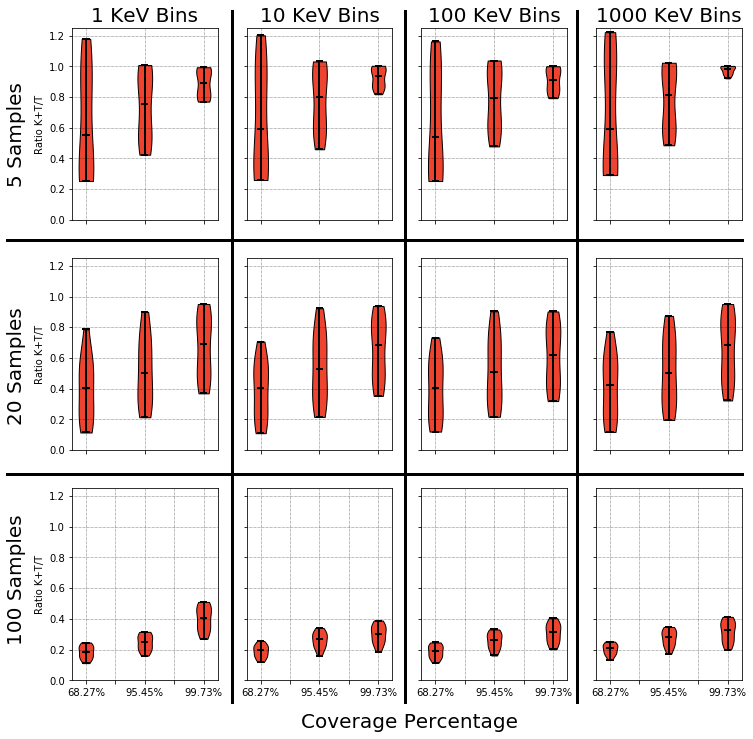

In [6]:
fig = plt.figure(figsize = (12,12))
fig.tight_layout()
Nulim = [-12,-6.154902]
Etalim = [-12,-8.154902]
Lambdalim = [-12,-6.154902]
Nus= np.linspace(10**Nulim[0],10**Nulim[1],25)
Etas=np.linspace(10**Etalim[0],10**Etalim[1],25)
Lambdas=np.linspace(10**Lambdalim[0],10**Lambdalim[1],25)
stats=[.6827,.9545,.9973]
for i in range(0,len(config)):
    Qtemp = QDir[i]
    Vals={}
    for j in range(0,3):
        Vals[j] = np.array(Qtemp['KT,'+str(stats[j])])/np.array(Qtemp['T,'+str(stats[j])])
#         Vals[j] = Qtemp['KT,'+str(stats[j])]
#         if config[i][1]==1000:
#             Vals[j] = [item/8 for item in Vals[j]]
    ax = plt.subplot(3,4,i+1)
    parts = ax.violinplot([Vals[j] for j in range(0,3)],positions=[2,4,6],showmedians=True)
    
    for pc in parts['bodies']:
        pc.set_facecolor('#EE442F')
        pc.set_edgecolor('black')
        pc.set_alpha(1)
        
    for partname in ('cbars','cmins','cmaxes','cmedians'):
        vp = parts[partname]
        vp.set_edgecolor('k')
        vp.set_linewidth(2)
    
    ax.set_xticklabels([])
    if i <4:
        ax.set_title(str(config[i][1])+' KeV Bins',size=20)
    if i%4 !=0:
        ax.set_yticklabels([])
    else:
        ax.set_ylabel('Ratio K+T/T')
    if i>7:
        ax.set_xticks([2,3,4,5,6])
        ax.set_xticklabels(['68.27%','','95.45%','','99.73%'])
    ax.grid(linestyle=':', linewidth='0.5', color='k')
    ax.set_ylim([0,1.25])
#     ax.set_ylim([0,50000])

h1 = .635
h2 = .364
v1 = .51
v2 = .31
v3 = .71
plt.plot([.05, .9], [h1,h1], color='black', lw=3,transform=plt.gcf().transFigure, clip_on=False)
plt.plot([.05, .9], [h2,h2], color='black', lw=3,transform=plt.gcf().transFigure, clip_on=False)

plt.plot([v1,v1], [.1,.9], color='black', lw=3,transform=plt.gcf().transFigure, clip_on=False)
plt.plot([v2,v2], [.1,.9], color='black', lw=3,transform=plt.gcf().transFigure, clip_on=False)
plt.plot([v3,v3], [.1,.9], color='black', lw=3,transform=plt.gcf().transFigure, clip_on=False)

plt.text(.39,.07,'Coverage Percentage', transform=plt.gcf().transFigure,clip_on=False,size=20)
plt.text(.05,.8,'5 Samples', rotation=90,transform=plt.gcf().transFigure,clip_on=False,size=20)
plt.text(.05,.54,'20 Samples', rotation=90,transform=plt.gcf().transFigure,clip_on=False,size=20)
plt.text(.05,.3,'100 Samples', rotation=90,transform=plt.gcf().transFigure,clip_on=False,size=20)

# plt.show()
plt.savefig('RatioPlot_4_121236.png')

In [5]:
filename = 'ValsAdap/'

edges = [6,12,18]
a = list(itertools.product(edges, edges, edges))
a = [6,18,18]
samps=[5,20,50]
res = [1,10,100]
config = list(itertools.product(samps,res))
QDir = {}
QDirT = {}
QDirKT ={}
MINT={}
MINKT={}
a = [12,12,12]
for i in range(0,len(config)):
#     print(i)
    if config[i][1] == 1:
        EDirs=['Run2','Run3']
#         a = [12,12,12]
    elif config[i][1]==10:
        EDirs=['Run1','Run2']
#         a = [12,12,12]
    elif config[i][1]==100:
        EDirs=['Run1','Run3']
#         a = [12,12,12]
    elif config[i][1] == 1000:
        EDirs=['Run1','Run2','Run3']
#         a = [12,36,36]
    
    TestMechAn = MechAn(filename,Nu,Eta,Lambda)
    TestMechAn.SetParams(Res = config[i][1], Samps = config[i][0], TrueE=a)
    TestMechAn.FindFiles(ExcludeDirs=EDirs)
    TestMechAn.GetTestStatistic(newPercentiles=[.6827,.9545,.9973])
    Q = TestMechAn.GetAreas(returnStats=True)
    T,KT,minT,minKT=TestMechAn.GetVar()


    QDirT[i]=T
    QDirKT[i]=KT
    QDir[i]=Q
    MINT[i]=minT
    MINKT[i] =minKT

Found 0 files fitting those parameters


UnboundLocalError: local variable 'FullDF' referenced before assignment

In [ ]:

fig = plt.figure(figsize = (12,12))
fig.tight_layout()
Nulim = [-12,-6.154902]
Etalim = [-12,-8.154902]
Lambdalim = [-12,-6.154902]
Nus= np.linspace(10**Nulim[0],10**Nulim[1],50)
Etas=np.linspace(10**Etalim[0],10**Etalim[1],50)
Lambdas=np.linspace(10**Lambdalim[0],10**Lambdalim[1],50)
stats=[.6827,.9545,.9973]
for i in range(0,len(config)):
    Qtemp = QDir[i]
    Vals={}
    for j in range(0,3):
        Vals[j] = np.array(100*Qtemp['KT,'+str(stats[j])])/np.array(Qtemp['T,'+str(stats[j])])
#         Vals[j]=np.array(Qtemp['KT,'+str(stats[j])])
#         Vals[j] = Qtemp['KT,'+str(stats[j])]
        if config[i][1]==1000:
            Vals[j] = [item/8 for item in Vals[j]]
#     Vals = MINT[i]
    ax = plt.subplot(3,3,i+1)
    parts = ax.violinplot([Vals[j] for j in range(0,3)],positions=[2,4,6],showmedians=True)
#     parts = ax.violinplot(Vals,positions=[2],showmedians=True)

    for pc in parts['bodies']:
        pc.set_facecolor('#EE442F')
        pc.set_edgecolor('black')
        pc.set_alpha(1)
        
    for partname in ('cbars','cmins','cmaxes','cmedians'):
        vp = parts[partname]
        vp.set_edgecolor('k')
        vp.set_linewidth(2)
    
    ax.set_xticklabels([])
    if i <3:
        ax.set_title(str(config[i][1])+' KeV Bins',size=20)


    if i%3 !=0:
        ax.set_yticklabels([])
    else:
        ax.set_ylabel('Percent Area of K+T/T')
    if i>5:
        ax.set_xticks([2,3,4,5,6])
        ax.set_xticklabels(['68.27%','','95.45%','','99.73%'])
    ax.grid(linestyle=':', linewidth='0.5', color='k')
    ax.set_ylim([0,150])
#     ax.set_ylim([0,45000])

h1 = .635
h2 = .364
v1 = .652
v2 = .372
# plt.plot([.05, .9], [h1,h1], color='black', lw=3,transform=plt.gcf().transFigure, clip_on=False)
# plt.plot([.05, .9], [h2,h2], color='black', lw=3,transform=plt.gcf().transFigure, clip_on=False)

# plt.plot([v1,v1], [.1,.9], color='black', lw=3,transform=plt.gcf().transFigure, clip_on=False)
# plt.plot([v2,v2], [.1,.9], color='black', lw=3,transform=plt.gcf().transFigure, clip_on=False)
plt.text(.39,.07,'Coverage Percentage', transform=plt.gcf().transFigure,clip_on=False,size=20)
plt.text(.05,.8,'5 Samples', rotation=90,transform=plt.gcf().transFigure,clip_on=False,size=20)
plt.text(.05,.54,'20 Samples', rotation=90,transform=plt.gcf().transFigure,clip_on=False,size=20)
plt.text(.05,.3,'50 Samples', rotation=90,transform=plt.gcf().transFigure,clip_on=False,size=20)

# plt.show()
plt.savefig('AdaptArea121212Large4.png')